### Data Standardization (Z-score normalization)
![Light](https://user-images.githubusercontent.com/12748752/126914730-b5b13ba9-4d20-4ebf-b0ed-231af4c8b984.png)

* The result of standardization (or **Z-score normalization**) is that the features will be rescaled to ensure the mean and the standard deviation are 0 and 1, respectively. 
* Data Standardization is a data processing workflow that converts the structure of disparate datasets into a Common Data Format. 
* Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units (e.g., Pounds, Meters, Miles … etc).
* We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero.
* <img src="https://latex.codecogs.com/svg.image?z=\frac{(&space;x-x_{mean}&space;)}{StandardDeviation}" title="z=\frac{( x-x_{mean} )}{StandardDeviation}" />
* This technique to rescale features value with the distribution value between 0 and 1 is useful for the **optimization algorithms**, such as **gradient descent, that are used within machine-learning algorithms that weight inputs (e.g., regression and neural networks).**
* Rescaling is also used for algorithms that use **distance measurements**, for example, **K-nearest-neighbours (KNN)**.

In [2]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head(2)

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833


### Filling the missing value with median value in 'Age'

In [5]:
df['Age'].fillna(df.Age.median(),inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

### Separating the Dependent variable from the Indipendent Variables

In [6]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

### fit vs fit_transform
X_train_scaled=scaler.fit_transform(X_train)

X_test_scaled=scaler.transform(X_test)

In [9]:
### Model Building
## fit() for training and predict for test

from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()

classification.fit(X_train_scaled,y_train)
classification.predict(X_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

## Min Max Scaling / Max-Min Normalization
![Light](https://user-images.githubusercontent.com/12748752/126914730-b5b13ba9-4d20-4ebf-b0ed-231af4c8b984.png)
* Often used in CNN Deep Learning Techniques

* This technique is to re-scales features with a distribution value between 0 and 1.
* For every feature, the minimum value of that feature gets transformed into 0, and the maximum value gets transformed into 1.
* <img src="https://latex.codecogs.com/svg.image?X_{norm}&space;=&space;\frac{X&space;-&space;X.min}{X.max&space;-&space;X.min}" title="X_{norm} = \frac{X - X.min}{X.max - X.min}" />

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(X_train))
df_minmax.head()

,0,1,2
0,0.0,0.673285,0.101229
1,1.0,0.346569,0.030254
2,0.5,0.308872,0.081157
3,1.0,0.321438,0.028213
4,1.0,0.271174,0.020527


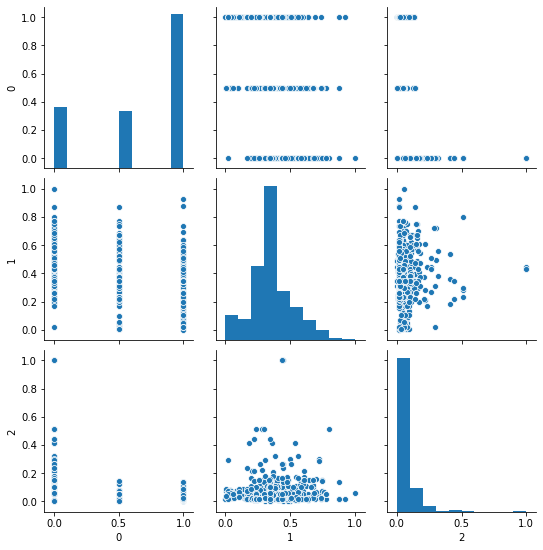

In [14]:
import seaborn as sns
sns.pairplot(df_minmax)

## Robust Scaler
![Light](https://user-images.githubusercontent.com/12748752/126914730-b5b13ba9-4d20-4ebf-b0ed-231af4c8b984.png)

* Robust Scaler are **robust to outliers.**
* It is used to scale the feature to median and quantiles.
* Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the Interquartile difference. The Interquartile difference is the difference between the 75th and 25th quantile:

* [**IQR = Difference between 3rd quartile and 1st quartile (75th Percentile  - 25th Percentile)**](https://github.com/iAmKankan/Statistics/blob/main/Percentage_Percentile.md)
* <img src="https://latex.codecogs.com/svg.image?X_{scaled}&space;=&space;\frac{X&space;-&space;X.median}{IQR}&space;&space;" title="X_{scaled} = \frac{X - X.median}{IQR} " />


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(X_train))
df_robust_scaler.head()

,0,1,2
0,-2.0,2.000000,1.602069
1,0.0,0.000000,0.044788
2,-1.0,-0.230769,1.161670
3,0.0,-0.153846,0.000000
4,0.0,-0.461538,-0.168630


### Standardisation vs Max-Min Normalization

![Light](https://user-images.githubusercontent.com/12748752/126914730-b5b13ba9-4d20-4ebf-b0ed-231af4c8b984.png)

| Standardization(z-score Normalization) | Normalization |
|:----------------------------------------:|:---------------:|
|larger standard deviations  |smaller standard deviations |
|  <img src="https://latex.codecogs.com/svg.image?z=\frac{(&space;x-x_{mean}&space;)}{StandardDeviation}" title="z=\frac{( x-x_{mean} )}{StandardDeviation}" /> | <img src="https://latex.codecogs.com/svg.image?X_{norm}&space;=&space;\frac{X&space;-&space;X.min}{X.max&space;-&space;X.min}" title="X_{norm} = \frac{X - X.min}{X.max - X.min}" />              | 
|                                        |               |

### Credits
* https://jpt.spe.org/data-transformation-standardization-vs-normalization
* https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html